
<h1><strong>Trabajo Práctico Integrador </strong></h1>

---
<br>

<center>
    <img src="images/imagen_tpi_am_1.png" width="450" align="center"/>
</center>

<br>

<center>
    <h2>Josselyn Ordoñez - Tatiana Arenas - Jorge Valdez</h2>
</center>

<h2>Dataset: Stellar Classification Dataset - SDSS17</h2>

<h3>Contexto</h3>

<p>
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, quásares y estrellas es uno de los más fundamentales en astronomía. La catalogación temprana de las estrellas y su distribución en el cielo ha llevado a comprender que forman nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se comenzaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y quásares en función de sus características espectrales.
</p>

<p>
Contenido
Los datos constan de 100.000 observaciones del espacio realizadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como estrella, galaxia o quásar.
</p>

1. obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por CAS
2. alpha = ángulo de Ascensión Recta (en la época J2000)
3. delta = ángulo de declinación (en la época J2000)
4. u = Filtro ultravioleta en el sistema fotométrico
5. g = Filtro verde en el sistema fotométrico
6. r = Filtro rojo en el sistema fotométrico
7. i = Filtro de infrarrojo cercano en el sistema fotométrico
8. z = Filtro de infrarrojos en el sistema fotométrico
9. run_ID = Número de ejecución utilizado para identificar el análisis específico
10. rereun_ID = Número de repetición para especificar cómo se procesó la imagen
11. cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
12. field_ID = Número de campo para identificar cada campo
13. spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
14. class = clase de objeto (galaxia, estrella u objeto cuásar)
15. redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
16. plate = ID de placa, identifica cada placa en SDSS
17. MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó un determinado dato del SDSS
18. fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación



<h3>Tabla de Contenidos</h3>
<a id="indice"></a>
<div>
    <ul>
        <li>
            <span>
                <a href="#importacion">
                    <span>1&nbsp;&nbsp;</span>
                    <strong>Importación de librerías</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#carga"><span>2&nbsp;&nbsp;</span>
                    <strong>Carga de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#eda">
                    <span>3&nbsp;&nbsp;</span>
                    <strong>Análisis Exploratorio de Datos (EDA)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#preprocesado">
                    <span>4&nbsp;&nbsp;</span>
                    <strong>Preprocesado de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#division">
                    <span>5&nbsp;&nbsp;</span>
                    <strong>División en entrenamiento y prueba</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#pycaret">
                    <span>6&nbsp;&nbsp;</span>
                    <strong>Probemos autoML con pycaret</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#dt">
                    <span>7&nbsp;&nbsp;</span>
                    <strong>Primer modelo: Decision Tree</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#knn">
                    <span>8&nbsp;&nbsp;</span>
                    <strong>Segundo modelo: KNN (K Neighbors Classifier)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#rf">
                    <span>9&nbsp;&nbsp;</span>
                    <strong>Tercer modelo: Random Forest</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#qda">
                    <span>10&nbsp;&nbsp;</span>
                    <strong>Cuarto modelo: QDA (Quadratic Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lda">
                    <span>11&nbsp;&nbsp;</span>
                    <strong>Quinto modelo: LDA (Linear Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#smv">
                    <span>12&nbsp;&nbsp;</span>
                    <strong>Sexto modelo: Support Vector Machine</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lgbm">
                    <span>13&nbsp;&nbsp;</span>
                    <strong>Septimo modelo: Light Gradient Boosting Machine (lightgbm</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#conclusion">
                    <span>14&nbsp;&nbsp;</span>
                    <strong>Conclusión</strong>
                </a>
            </span>
        </li>
    </ul>
</div>

<a id="importacion"></a>
## 1. Importación de librerías

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

<a id="carga"></a>
## 2. Carga de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [2]:
# Definimos ls rutas de entrada y salida
DATASET_PATH = "../data/"
OUTPUT_PATH = "../output/"

# Cargamos el dataset
df = pd.read_csv(DATASET_PATH+'star_classification.csv')


In [3]:
# Veamos las primeras 5 filas
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.shape

(100000, 18)

In [6]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
len(df.columns)


18

<a id="eda"></a>
## 3. Análisis exploratorio de datos(EDA)

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



Veamos la información estadística del dataset

In [8]:
df.describe().T # Transpongo para que se vea mejor

count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03

Veamos los valores unicos de las columnas

In [9]:
# Recorro las columnas y muestro los valores unicos
for col in df.columns:
    print("Nombre Columna: ",col," valores únicos: ", len(df[col].unique()))

Nombre Columna:  obj_ID  valores únicos:  78053
Nombre Columna:  alpha  valores únicos:  99999
Nombre Columna:  delta  valores únicos:  99999
Nombre Columna:  u  valores únicos:  93748
Nombre Columna:  g  valores únicos:  92651
Nombre Columna:  r  valores únicos:  91901
Nombre Columna:  i  valores únicos:  92019
Nombre Columna:  z  valores únicos:  92007
Nombre Columna:  run_ID  valores únicos:  430
Nombre Columna:  rerun_ID  valores únicos:  1
Nombre Columna:  cam_col  valores únicos:  6
Nombre Columna:  field_ID  valores únicos:  856
Nombre Columna:  spec_obj_ID  valores únicos:  100000
Nombre Columna:  class  valores únicos:  3
Nombre Columna:  redshift  valores únicos:  99295
Nombre Columna:  plate  valores únicos:  6284
Nombre Columna:  MJD  valores únicos:  2180
Nombre Columna:  fiber_ID  valores únicos:  1000


In [10]:
# Veo los valores únicos de la columna 'cam_col'
df['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

In [11]:
# Los ordeno
np.sort(df['cam_col'].unique())

array([1, 2, 3, 4, 5, 6])

In [12]:
# Veo los valores únicos de la columna 'class'
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

cam_col posee 6 valores únicos.
class posee 3 valores unicos

Veamos cuales son.

Veamos la columna '``class``'

In [13]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

Visualizamos los datos

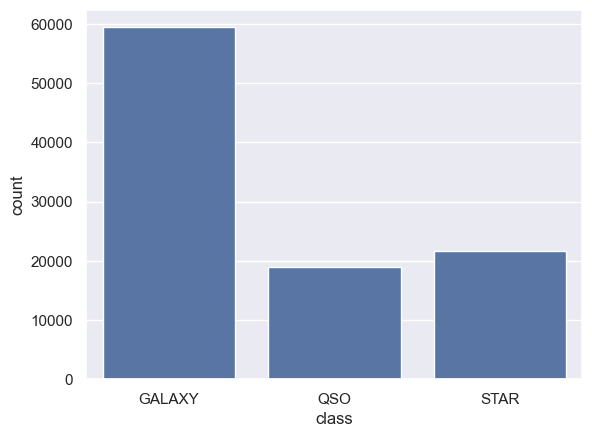

In [14]:
# Grafiquemos la distribución de las clases
sns.countplot(x='class', data=df)

plt.show()

Graficamos la distribucion de las columnas numericas

In [15]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3

import matplotlib.pyplot as plt
import seaborn as sns

class Graficos:
    def plot_numerical_distributions(self, df, NUMERICAL_FEATURES):
        """
        Grafica las distribuciones de las características numéricas del DataFrame dado.

        :param df: DataFrame de Pandas que contiene los datos.
        :param NUMERICAL_FEATURES: Lista de nombres de columnas numéricas en el DataFrame.
        """

        # Crea una figura con una matriz de subgráficos de 6x3
        fig, axes = plt.subplots(7, 3, figsize=(12, 18))
        fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subgráficos

        # Define una paleta de colores única para cada característica numérica
        colors = sns.color_palette('deep', n_colors=len(NUMERICAL_FEATURES))

        # Itera a través de las características numéricas y dibuja los histogramas con colores diferentes
        for i, (column, color) in enumerate(zip(NUMERICAL_FEATURES, colors)):
            row, col = divmod(i, 3)  # Calcula la fila y la columna actual
            ax = axes[row, col]  # Obtiene el subgráfico actual
            sns.histplot(df[column], ax=ax, kde=True, color=color)  # Dibuja el histograma con color y curva de la distribución

            # Agrega un título al subgráfico
            ax.set_title(f'Distribución de {column}')

        # Añade un título a la figura
        fig.suptitle('Histogramas y Curvas de Distribución de características numéricas', fontsize=16)

        # Ajusta automáticamente los espacios entre los subgráficos y muestra la figura
        plt.tight_layout()
        plt.show()


In [16]:
graficos = Graficos()

In [17]:
columnas = df.columns.tolist()


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


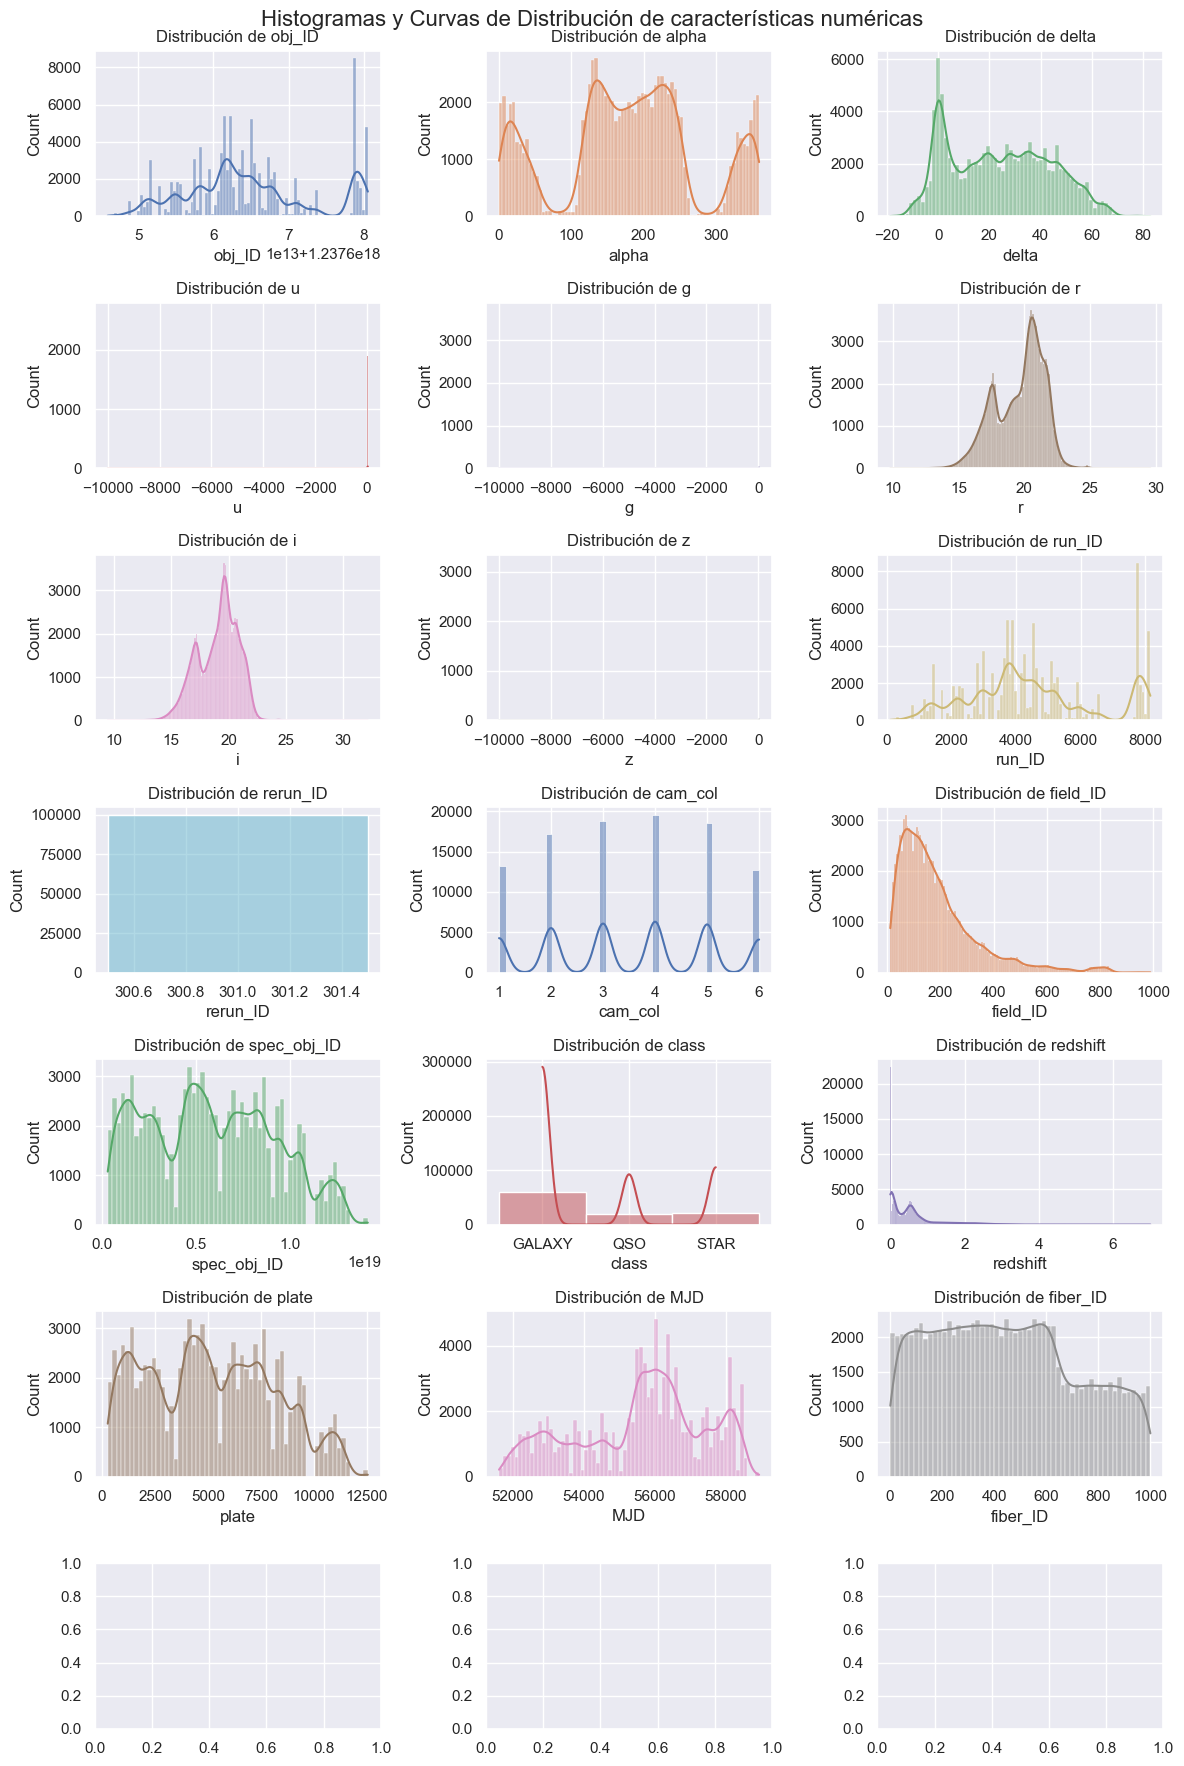

In [18]:
%time # Para ver cuanto tarda en ejecutarse esta celda

# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3
# Se puede comentarizar esta linea si no se quiere graficar

#graficos.plot_numerical_distributions(df_label_encoder, NUMERICAL_FEATURES)
graficos.plot_numerical_distributions(df, columnas)

Veamos la distribucion de las principales variables en funcion a la clase

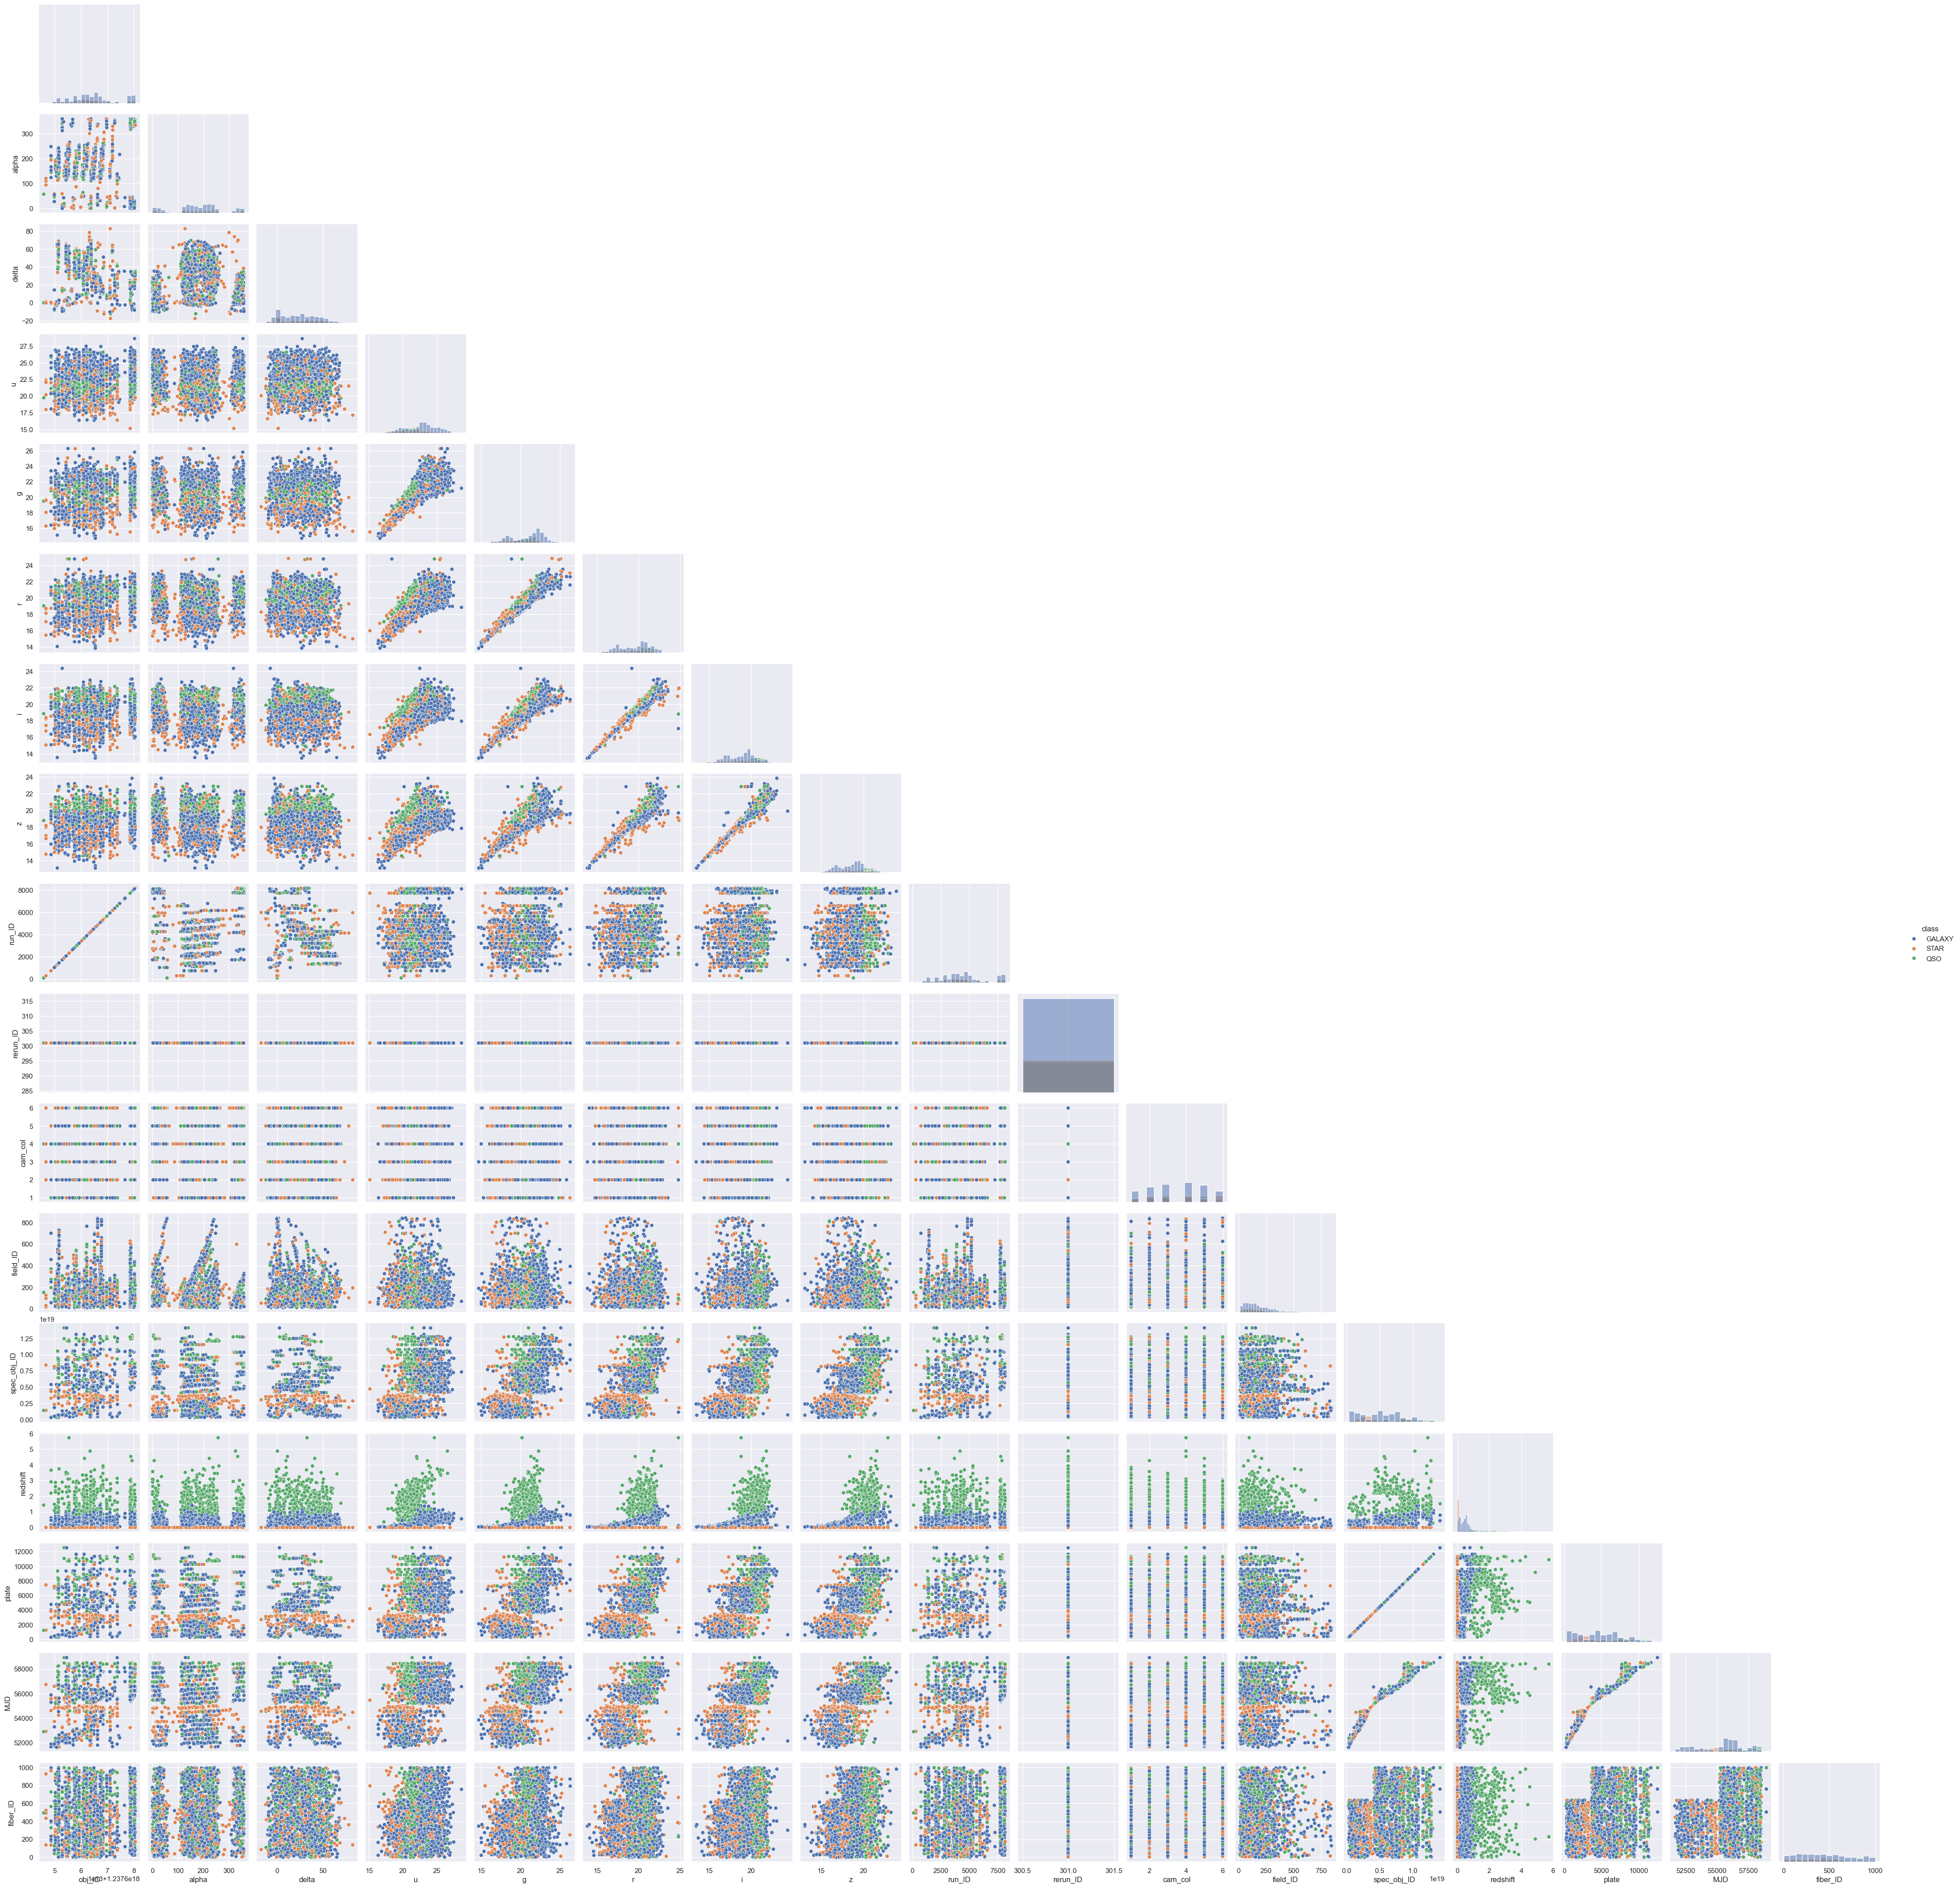

In [19]:
# Grafico de pairplot
#sns.pairplot(df, hue='class')
# pair_plot = sns.pairplot(df, hue="class", diag_kind="hist", corner=True)# Tarda como 20 minutos en correr
pair_plot = sns.pairplot(df.sample(2000), hue="class", diag_kind="hist", corner=True) 

# Guarda el gráfico en un archivo (por ejemplo, en formato PNG)
pair_plot.savefig(OUTPUT_PATH+'pair_plot.png')
plt.show()


<a id="preprocesado"></a>

## 4. Preprocesado de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



### Codificación de variables categoricas.

Como vimos class y cam_col son categóricas

- Vamos a usa label encoder con class 
- Vamos a usar label encoder con cam_col

Para la feature '``class``' reemplazaremos por los siguientes valores:

- 0 = GALAXY
- 1 = OSO
- 2 = STAR

Para la feature '``cam_col``' reemplazaremos por los siguientes valores:

- 0 = 1
- 1 = 2
- 2 = 3
- 3 = 4
- 4 = 5
- 5 = 6

In [20]:
# hago una copia del dataset
df_label_encoder = df.copy()

In [21]:
from sklearn.preprocessing import LabelEncoder # Codificar variables categóricas

# convertimos la columna 'class' a valores numéricos

# Definir una función lambda para mapear los valores a números
le = LabelEncoder()

df_label_encoder['class']=le.fit_transform(df_label_encoder['class'])

# convertimos la columna 'cam_col' a valores numéricos
df_label_encoder['cam_col']=le.fit_transform(df_label_encoder['cam_col'])

In [22]:
# Verificamos los valores únicos de la columna 'class'
df_label_encoder['class'].unique() 

array([0, 1, 2])

In [23]:
# Verificamos los valores únicos de la columna 'cam_col'
df_label_encoder['cam_col'].unique()

array([1, 4, 2, 3, 5, 0])

In [24]:
df_label_encoder.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        1        79  6.543777e+18   
1  21.16812  21.61427    4518       301        4       119  1.176014e+19   
2  19.34857  18.94827    3606       301        1       120  5.152200e+18   
3  20.50454  19.25010    4192       301        2       214  1.030107e+19   
4  15.97711  15.54461    8102       301        2       137  6.891865e+18   

   class  redshift  plate    MJD  fiber_ID  
0      0  0.634794   5812  56354       171  
1      0  0.779136  10445  58158       427  
2      0  0.644195   4576  55592       299  
3      0  0.932346   9149  58039       775  
4      0  0.116123   6121  56187       842

In [25]:
df_label_encoder.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Separamos las variables númericas y la feature objetivo

In [26]:
NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

In [27]:
LABEL = 'class'

In [28]:
# veamos si hay valores nulos
df_label_encoder.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [29]:
# La columna rerun_ID tiene un solo valor, por lo que no aporta información
NUMERICAL_FEATURES.remove('rerun_ID') 

# Elimino la columna rerun_ID
df_label_encoder.drop(columns=['rerun_ID'], inplace=True)

In [30]:
NUMERICAL_FEATURES

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

### Veamos la correlación

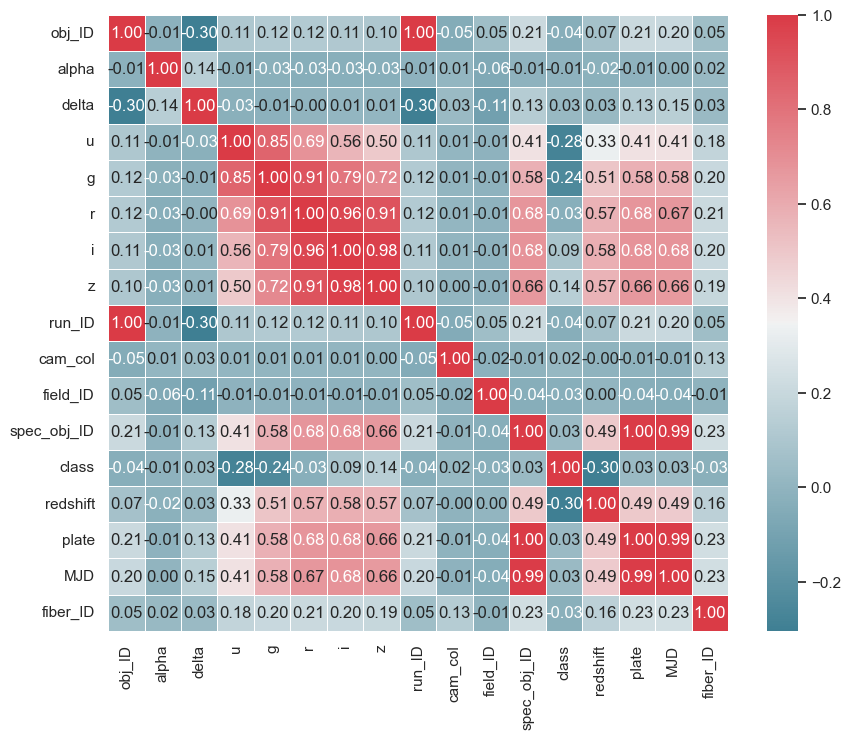

In [31]:
# Tabla de correlacion completa
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(df_label_encoder.corr("spearman"), cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",linewidths=0.5)
sns.set(font_scale=0.9)


# Mostrar el gráfico
plt.show()

In [32]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
#df.corr()['class'].sort_values(ascending=False)

# Imprimo los valores de mayor a menor de correlación con la variable objetivo pero el valor absoluto
df_label_encoder.corr("spearman")['class'].abs().sort_values(ascending=False)

class          1.000000
redshift       0.304301
u              0.280591
g              0.244818
z              0.142171
i              0.087809
run_ID         0.039164
obj_ID         0.039022
r              0.034202
MJD            0.031478
field_ID       0.031277
spec_obj_ID    0.031188
plate          0.031186
fiber_ID       0.028011
delta          0.025666
cam_col        0.021264
alpha          0.011693
Name: class, dtype: float64

In [33]:
# Eliminemos las columnas que tienen una correlación mayor a 0.6 con otra columna
# Elimino la columna obj_ID
NUMERICAL_FEATURES.remove('obj_ID') # obj_ID tiene una correlación de 1 con spec_obj_ID
NUMERICAL_FEATURES.remove('run_ID') # run_ID tiene una correlación de 1 con MJD
NUMERICAL_FEATURES.remove('g') # g tiene una correlación de 0.98 con u
NUMERICAL_FEATURES.remove('r') # r tiene una correlación de 0.96 con i y 0.92 con z
NUMERICAL_FEATURES.remove('z') # z tiene una correlación de 0.98 con redshift
NUMERICAL_FEATURES.remove('spec_obj_ID') # spec_obj_ID tiene una correlación de 1 con obj_ID
NUMERICAL_FEATURES.remove('MJD') # MJD tiene una correlación de 1 con run_ID
NUMERICAL_FEATURES.remove('plate') # plate tiene una correlación de 1 con fiber_ID

NUMERICAL_FEATURES.remove('i') # i tiene una correlación de 0.58 con redshift



# Elimino la columnas que tienen una correlación mayor a 0.6 con otra columna
df_label_encoder.drop(columns=['obj_ID'], inplace=True)
df_label_encoder.drop(columns=['run_ID'], inplace=True)
df_label_encoder.drop(columns=['g'], inplace=True)
df_label_encoder.drop(columns=['r'], inplace=True)
df_label_encoder.drop(columns=['z'], inplace=True)
df_label_encoder.drop(columns=['spec_obj_ID'], inplace=True)
df_label_encoder.drop(columns=['MJD'], inplace=True)
df_label_encoder.drop(columns=['plate'], inplace=True)

df_label_encoder.drop(columns=['i'], inplace=True)



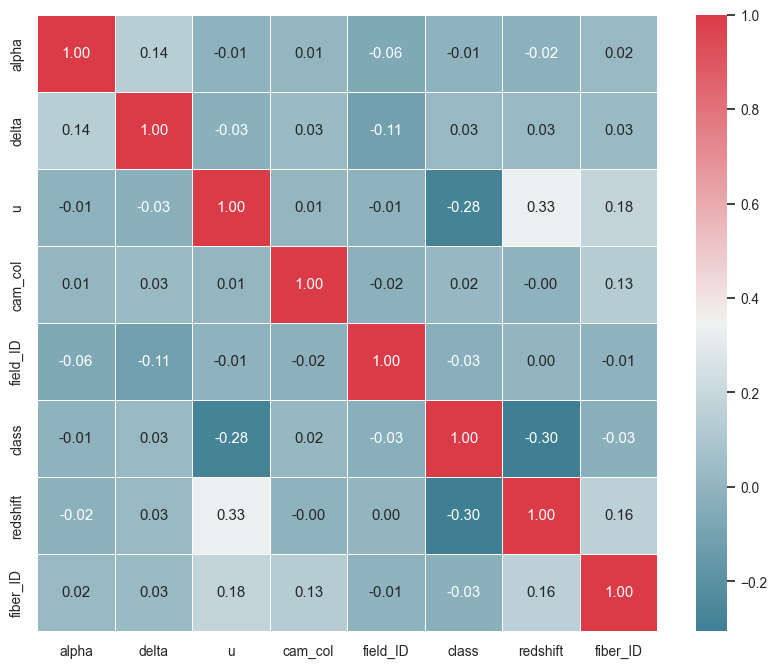

In [34]:
# Tabla de correlacion completa
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
#sns.heatmap(df_label_encoder.corr("spearman"), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
sns.heatmap(df_label_encoder.corr("spearman"), cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f", linewidths=.5)
sns.set(font_scale=0.9)

# Mostrar el gráfico
plt.show()

<a id="division"></a>

## 5. División en entrenamiento y prueba

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [35]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = df_label_encoder.loc[:,NUMERICAL_FEATURES].values
y = df_label_encoder.loc[:,LABEL].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [37]:
# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<a id="pycaret"></a>

## 6. Probemos autoML con pycaret

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>




In [38]:
df_label_encoder.head()

alpha      delta         u  cam_col  field_ID  class  redshift  \
0  135.689107  32.494632  23.87882        1        79      0  0.634794   
1  144.826101  31.274185  24.77759        4       119      0  0.779136   
2  142.188790  35.582444  25.26307        1       120      0  0.644195   
3  338.741038  -0.402828  22.13682        2       214      0  0.932346   
4  345.282593  21.183866  19.43718        2       137      0  0.116123   

   fiber_ID  
0       171  
1       427  
2       299  
3       775  
4       842

In [39]:
from pycaret.classification import * # Importo todas las funciones de clasificación de PyCaret

In [40]:
# La función setup inicializa el entorno en PyCaret y crea el pipeline de transformación

#clf = setup(data=df, target='class') # Usen este para solo CPU
clf = setup(data=df_label_encoder, target='class', use_gpu=True) # Usen este si tienen GPU

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [41]:
%time # Para ver cuanto tarda en ejecutarse esta celda
# Tarda bastante en ejecutarse, depende de la computadora

# Comparo todos los modelos disponibles y devuelvo el mejor
best_model = compare_models()

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


>
  - Con CPU Tardo  52m 52s
  - Con GPU Tardo  8m 19.9s. 
  

<a id="dt"></a>

## 7. Primer modelo: Decision Tree

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



In [42]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [43]:
from sklearn.tree import export_graphviz
import graphviz # Para visualizar el arbol en formato dot o exportarlo a pdf o png


In [44]:
export_graphviz(classification, out_file = OUTPUT_PATH+"arbol_clasificacion.dot",feature_names=NUMERICAL_FEATURES)

In [45]:
graph = graphviz.Source.from_file(OUTPUT_PATH+'arbol_clasificacion.dot')
graph.render(OUTPUT_PATH+'arbol_clasificacion', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.345297 to fit


'../output/arbol_clasificacion.png'

#### Veamos la imagen generada del árbol. 
<img src="../output/arbol_clasificacion.png" height="1024px">

In [46]:
from sklearn.metrics import f1_score

y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")

F1-score de entrenamiento fue: 1.0
F1-score de testeo fue: 0.9458779058881132


#### Usemos Cross Validation

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [48]:
%time # Para ver cuanto tarda en ejecutarse esta celda

# Hagamos Cross-validation para varios valores de profundidad del arbol
scores_list = [] # Lista para guardar los scores de cada fold de cada profundidad
depth_array = np.arange(1, 30) # Array con los valores de profundidad del arbol a probar
leaf_array = np.zeros_like(depth_array) # Array para guardar la cantidad de hojas de cada arbol de cada profundidad
for index, depth in enumerate(depth_array): # Itero por cada profundidad
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth) # Creo el arbol con la profundidad actual
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro') # Creo el scorer con la funcion f1_score y le paso el parametro average='macro' porque es un problema multiclase si o si tiene que ser macro
    #scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')))
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1))) # Guardo los scores de cada fold de cada profundidad en la lista
    clf.fit(X_train, y_train) # Entreno el arbol con la profundidad actual

scores_array = np.array(scores_list) # Convierto la lista a un array de numpy para poder manipularlo mejor
del scores_list # Borro la lista para liberar memoria

df_results = pd.DataFrame({"depth": depth_array, # Creo un dataframe con los resultados
                           "f11": scores_array[:, 0], 
                           "f12": scores_array[:, 1], 
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})# Guardo los scores de cada fold de cada profundidad en el dataframe

df_results = pd.melt(df_results, id_vars=['depth'], value_vars=["f11", "f12", "f13", "f14", "f15"]) # Derrito el dataframe para poder graficarlo mejor

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.39 µs


In [49]:
# Ordenamos los resultados ordenados por score
df_results_sorted = df_results.sort_values(by='value', ascending=False)

In [50]:
df_results_sorted

depth variable     value
124      9      f15  0.969185
123      8      f15  0.968862
122      7      f15  0.967038
121      6      f15  0.966539
125     10      f15  0.966042
..     ...      ...       ...
116      1      f15  0.617573
87       1      f14  0.615802
0        1      f11  0.615802
29       1      f12  0.615508
58       1      f13  0.613600

[145 rows x 3 columns]

- El mejor valor de depth es 9 con una precisión promedio de 0.969185

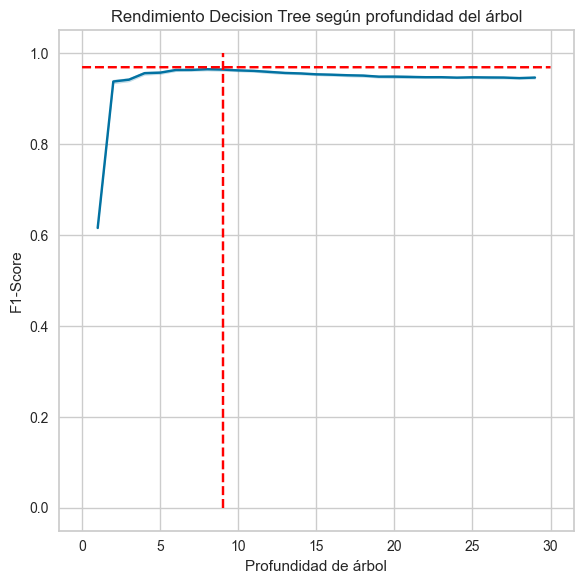

In [51]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="value", errorbar="sd", ax=ax)
ax.plot([9, 9], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.9691, 0.969], color="red", linestyle="--")

plt.title("Rendimiento Decision Tree según profundidad del árbol")
ax.set_xlabel("Profundidad de árbol")
ax.set_ylabel("F1-Score")
plt.tight_layout()

- Entrenamos el modelo usando los mejores parámetros depth = 9

In [52]:
# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [53]:
# veamos el nivel de importancía de las variables para el modelo a la hora de tomar la decisión 
importances = classification.feature_importances_
feature_names = np.array(df_label_encoder.loc[:,NUMERICAL_FEATURES].columns) 
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

Feature  Importance
5  redshift    0.931265
2         u    0.058190
1     delta    0.003970
0     alpha    0.003713
4  field_ID    0.001558
6  fiber_ID    0.001059
3   cam_col    0.000244

- Grafiquemos la curva ROC para cada una de las clases

In [54]:
#y_pred = classification.predict_proba(X_test)


In [55]:
y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)
y_scores = classification.predict_proba(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_dt = f1_score(y_test, y_pred, average='macro')

In [56]:
f1_dt

0.9641706836432276

In [57]:
from sklearn.metrics import roc_auc_score

# Opción para multiclase
multi_class_option = 'ovr'  # Puede ser 'ovr' para One-vs-Rest o 'ovo' para One-vs-One

# Calcular AUC utilizando el enfoque elegido
auc_dt = roc_auc_score(y_test, y_scores, multi_class=multi_class_option)


In [58]:
auc_dt

0.9871270581251235

In [59]:
y_pred = classification.predict_proba(X_test)

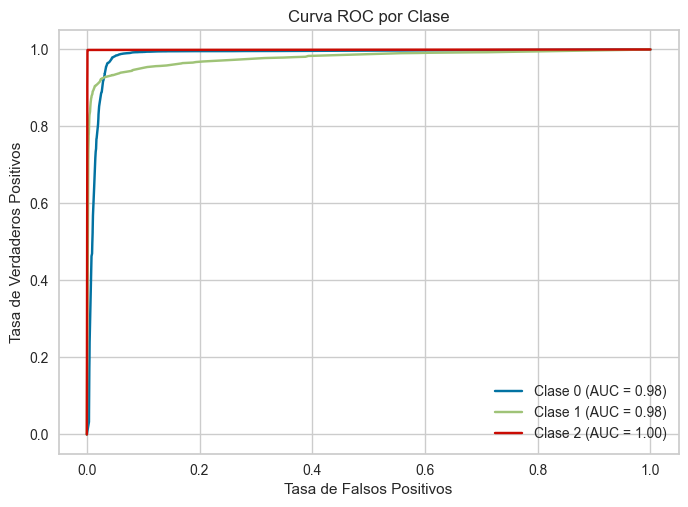

In [60]:
from sklearn.metrics import roc_curve, auc

#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

In [61]:
export_graphviz(classification, out_file = OUTPUT_PATH+"arbol_clasificacion_level9.dot",feature_names=NUMERICAL_FEATURES)

In [62]:
# Convertimos el archivo DOT en un archivo PNG.
graph = graphviz.Source.from_file(OUTPUT_PATH+'arbol_clasificacion_level9.dot')
graph.render(OUTPUT_PATH+'arbol_clasificacion_level9', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.912781 to fit


'../output/arbol_clasificacion_level9.png'

#### Veamos la imágen generada del árbol con mejores hiperparámetros. 
<img src="../output/arbol_clasificacion_level9.png" height="1024px">

<a id="knn"></a>

## 8. Segundo modelo: KNN

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el clasificador KNN
clasificacion_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Y entrenamos
clasificacion_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:

y_pred_train = clasificacion_knn.predict(X_train)
y_pred = clasificacion_knn.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento KNN fue: {f1_train}")
print(f"F1-score de testeo KNN fue: {f1}")

F1-score de entrenamiento KNN fue: 0.9153646607901024
F1-score de testeo KNN fue: 0.87636461947


#### Usemos Cross Validation con KNN

In [65]:
%time # Mide el tiempo de ejecución de la celda

# Hagamos Cross-validation para varios número de vecinos
scores_list = []
k_array = np.arange(1, 31)
for index, k in enumerate(k_array):
    clasificacion_knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2) #, weights='uniform', algorithm='auto')
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro')
    scores_list.append(np.abs(cross_val_score(clasificacion_knn, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)))
    clasificacion_knn.fit(X_train, y_train)

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"k_range": k_array,
                           "f11": scores_array[:, 0],
                           "f12": scores_array[:, 1],
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['k_range'], value_vars=["f11", "f12", "f13", "f14", "f15"])

# Ordenemos por value
df_results_sorted = df_results.sort_values(by='value', ascending=False)

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs


In [66]:
df_results_sorted

k_range variable     value
122        3      f15  0.886015
124        5      f15  0.885339
126        7      f15  0.880458
62         3      f13  0.880367
92         3      f14  0.879561
..       ...      ...       ...
27        28      f11  0.837852
57        28      f12  0.837661
29        30      f11  0.835530
59        30      f12  0.835095
91         2      f14  0.832479

[150 rows x 3 columns]

>

    - El mejor valor de K es 3 con una precisión promedio de 0.886015

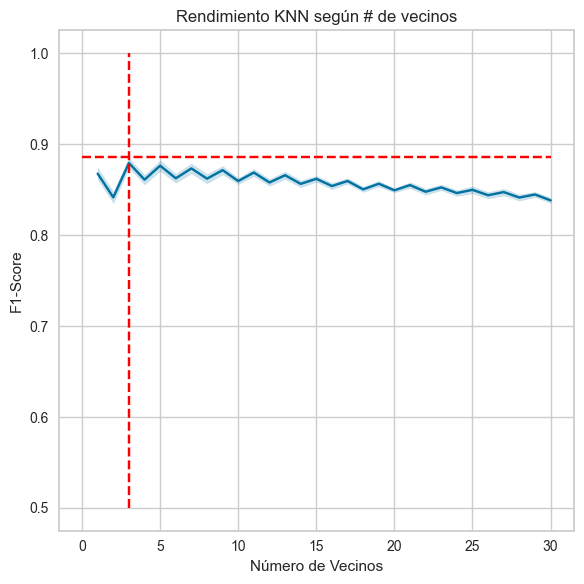

In [67]:
# Tomando el mejor valor de K, y el promedio de los 10 folds graficamos

f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="k_range", y="value", errorbar="sd", ax=ax)
ax.plot([3, 3], [0.5, 1], color="red", linestyle="--")
ax.plot([0, 30], [0.886, 0.886], color="red", linestyle="--")

plt.title("Rendimiento KNN según # de vecinos")
ax.set_xlabel("Número de Vecinos")
ax.set_ylabel("F1-Score")
plt.tight_layout()

- Entrenamos el modelo usando los mejores parámetros k = 3

In [68]:
# Creamos el clasificador KNN
clasificacion_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

# Y entrenamos
clasificacion_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

- Grafiquemos la curva ROC para cada una de las clases 

In [69]:
y_pred_train = clasificacion_knn.predict(X_train)
y_pred = clasificacion_knn.predict(X_test)
y_scores = clasificacion_knn.predict_proba(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro')

In [70]:
f1_knn

0.8774316602534372

In [71]:
# Calcular AUC utilizando el enfoque elegido
auc_knn = roc_auc_score(y_test, y_scores, multi_class=multi_class_option)

In [72]:
auc_knn

0.9416928727941646

In [73]:
y_pred = clasificacion_knn.predict_proba(X_test)

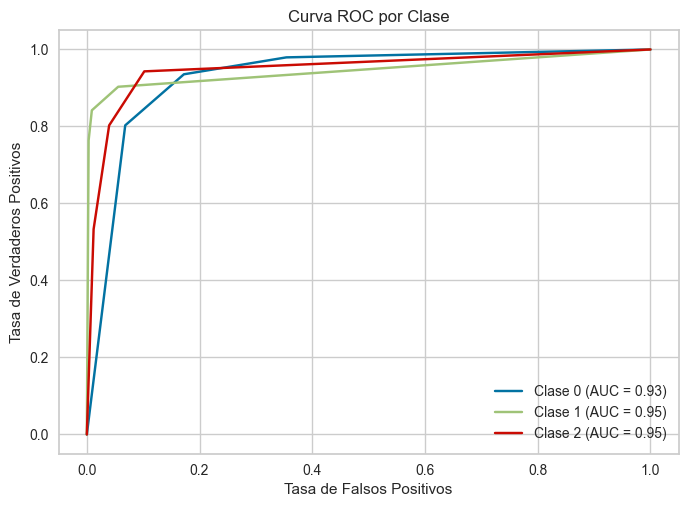

In [74]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()


<a id="rf"></a>

## 9. Tercer modelo: Random Forest

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

In [76]:
%time # Para ver cuanto tarda en ejecutarse la celda

scores_list = [] # Lista para guardar los scores de cada fold
depth_array = np.arange(1, 30) # Ejemplo de diferentes profundidades
estimators_array = [10, 50, 100, 200]  # Ejemplo de diferentes números de árboles
results = [] # Lista para guardar los resultados

for depth in depth_array: # Recorrer las profundidades
    for n_estimators in estimators_array:
        clf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=depth, random_state=42, n_jobs=-1)

        # Crear un scorer personalizado
        macro_f1_scorer = make_scorer(f1_score, average='macro')

        # Calcular los scores usando cross-validation
        scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)
        scores_mean = np.abs(scores).mean()

        # Guardar los resultados
        results.append({'depth': depth, 'n_estimators': n_estimators, 'score': scores_mean})

# Convertir los resultados en un DataFrame
df_results = pd.DataFrame(results)

# Si deseas ver los resultados ordenados por score
df_results_sorted = df_results.sort_values(by='score', ascending=False)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs


In [77]:
df_results_sorted

depth  n_estimators     score
99      25           200  0.966414
111     28           200  0.966382
98      25           100  0.966358
103     26           200  0.966340
75      19           200  0.966336
..     ...           ...       ...
5        2            50  0.615491
3        1           200  0.543187
1        1            50  0.541723
2        1           100  0.541504
0        1            10  0.248507

[116 rows x 3 columns]

Mejores parametros:
- n_estimators = 200
- depth = 25

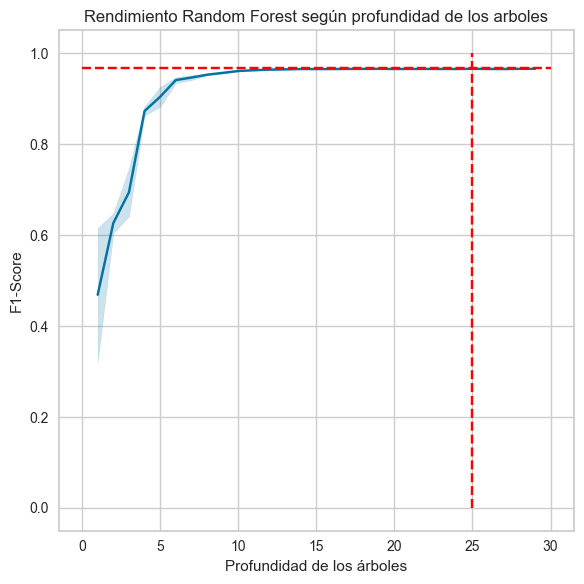

In [78]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="score", errorbar="sd", ax=ax)
ax.plot([25, 25], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.9664, 0.9664], color="red", linestyle="--")

plt.title("Rendimiento Random Forest según profundidad de los arboles")
ax.set_xlabel("Profundidad de los árboles")
ax.set_ylabel("F1-Score")
plt.tight_layout()

In [79]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=25, random_state=42, n_jobs=-1)

In [80]:
# Entrenar el modelo usando el conjunto de entranamiento
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

- Grafiquemos la curva ROC para cada una de las clases 

In [81]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')

In [82]:
f1_rf

0.9665407748869734

In [83]:
from sklearn.metrics import roc_auc_score

# Opción para multiclase
multi_class_option = 'ovr'  # Puede ser 'ovr' para One-vs-Rest o 'ovo' para One-vs-One

# Calcular AUC utilizando el enfoque elegido
auc_rf = roc_auc_score(y_test, y_scores, multi_class=multi_class_option)

In [84]:
auc_rf

0.9912204937276424

In [85]:
y_pred = rf.predict_proba(X_test)

>   

    - En esta parte grafique la curva ROC y los valores AUC de cada clase, Era redundante tener los gráficos anteriores y este.
    - Luego elimino los anteriores y dejare este.

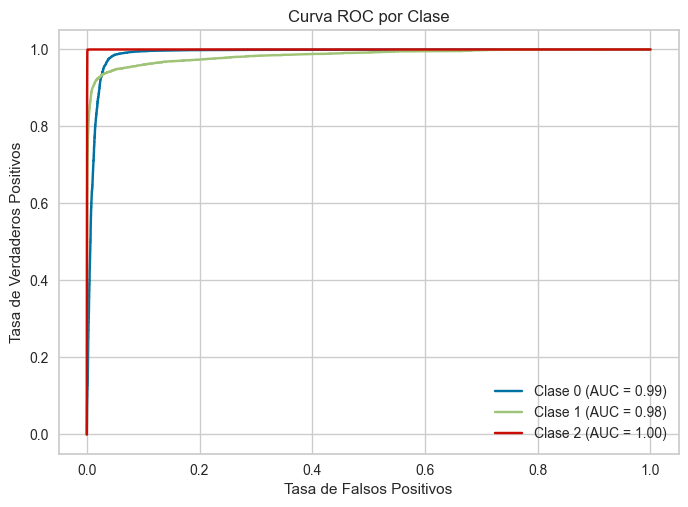

In [86]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()


<a id="qda"></a>

## 10. Cuarto modelo: QDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [87]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [88]:
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6
0 -0.483906 -1.009458 -0.866438 -0.320282 -0.494149 -0.575782 -1.041712
1  0.497567  0.458092 -0.985196  0.937839  2.756922 -0.789576 -0.274832
2  0.432590  1.594131 -0.991987  0.308779 -0.750458 -0.789209  0.095765
3  0.012590  0.604145 -1.884833  1.566899 -0.797673 -0.695288 -0.483981
4  0.158745 -0.276445  0.971049 -1.578402 -0.541364 -0.049590  0.224190

In [89]:
y_pred_qda = qda.predict_proba(X_test)

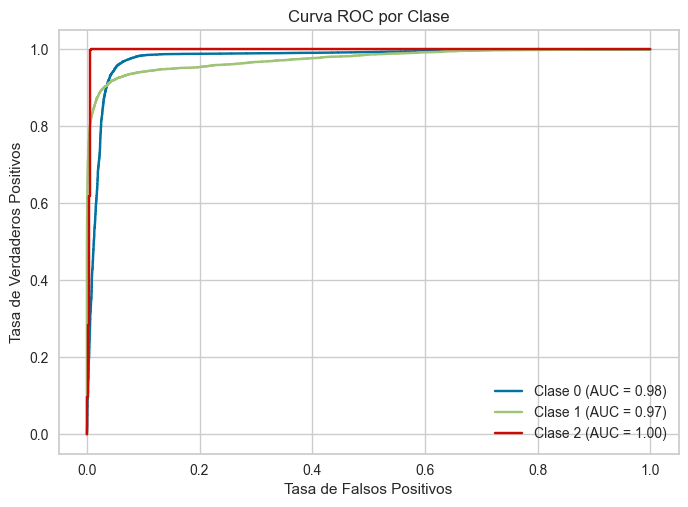

In [90]:
from sklearn.metrics import roc_curve, auc
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr_qda = dict()
tpr_qda = dict()
roc_auc_qda = dict()
n_classes_qda = y_pred_qda.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes_qda):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr_qda[i], tpr_qda[i], _ = roc_curve(y_test == i, y_pred_qda[:, i])
    roc_auc_qda[i] = auc(fpr_qda[i], tpr_qda[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes_qda):
    plt.plot(fpr_qda[i], tpr_qda[i], label=f'Clase {i} (AUC = {roc_auc_qda[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

In [91]:
from sklearn.metrics import f1_score
# Para el promedio 'micro':
f1_micro = f1_score(y_test, qda.predict(X_test), average='micro')

# Para el promedio 'macro':
f1_macro = f1_score(y_test, qda.predict(X_test), average='macro')

# Para el promedio 'weighted':
f1_weighted = f1_score(y_test, qda.predict(X_test), average='weighted')

print(f'F1 (Micro): {f1_micro}')
print(f'F1 (Macro): {f1_macro}')
print(f'F1 (Weighted): {f1_weighted}')

F1 (Micro): 0.9549333333333333
F1 (Macro): 0.9473658748329398
F1 (Weighted): 0.9544373144987391


In [92]:
# Calcular AUC utilizando el enfoque elegido
auc_qda = roc_auc_score(y_test, qda.predict_proba(X_test), multi_class=multi_class_option)

In [93]:
auc_qda

0.982995782427856

<a id="lda"></a>

## 11. Quinto modelo: LDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [95]:
y_pred_lda = lda.predict_proba(X_test)

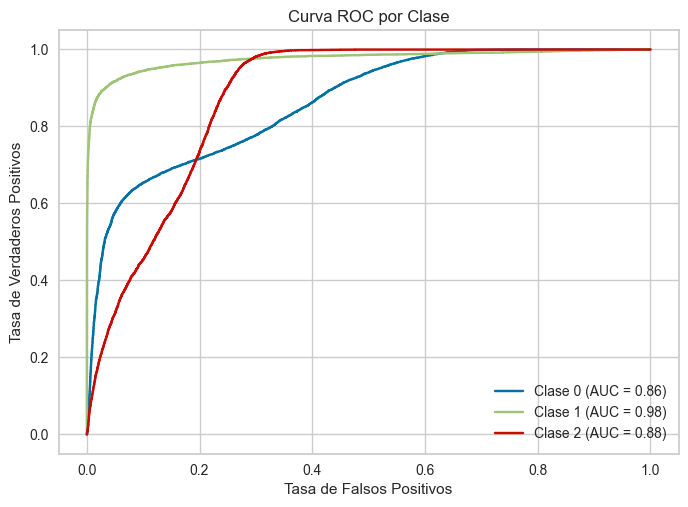

In [96]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr_lda = dict()
tpr_lda = dict()
roc_auc_lda = dict()
n_classes_lda = y_pred_lda.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes_lda):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr_lda[i], tpr_lda[i], _ = roc_curve(y_test == i, y_pred_lda[:, i])
    roc_auc_lda[i] = auc(fpr_lda[i], tpr_lda[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes_lda):
    plt.plot(fpr_lda[i], tpr_lda[i], label=f'Clase {i} (AUC = {roc_auc_lda[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

In [97]:
# Para el promedio 'micro':
f1_micro = f1_score(y_test, lda.predict(X_test), average='micro')

# Para el promedio 'macro':
f1_macro = f1_score(y_test, lda.predict(X_test), average='macro')

# Para el promedio 'weighted':
f1_weighted = f1_score(y_test, lda.predict(X_test), average='weighted')

print(f'F1 (Micro): {f1_micro}')
print(f'F1 (Macro): {f1_macro}')
print(f'F1 (Weighted): {f1_weighted}')

F1 (Micro): 0.7512
F1 (Macro): 0.6381872758281558
F1 (Weighted): 0.7036780656793258


In [98]:
# Calcular AUC utilizando el enfoque elegido
auc_lda = roc_auc_score(y_test, lda.predict_proba(X_test), multi_class=multi_class_option)

In [99]:
auc_lda

0.904691018153597

<a id="smv"></a>

## 12. Sexto modelo: Support Vector Machine

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [100]:
#Probaremos el modelo solo con 2 variables: redshit y r
df_smv = df[["u","redshift","class"]].copy()


In [101]:
from sklearn.preprocessing import LabelEncoder # Codificar variables categóricas

# convertimos la columna 'class' a valores numéricos

# Definir una función lambda para mapear los valores a números
le = LabelEncoder()

df_smv['class']=le.fit_transform(df_smv['class'])

In [102]:
X = df_smv.loc[:,["u","redshift"]].values
y = df_smv.loc[:,"class"].values

In [103]:
from sklearn.model_selection import train_test_split
X_train_smv, X_test_smv, y_train_smv, y_test_smv = train_test_split(X, y, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train_smv = sc_X.fit_transform(X_train_smv)
X_test_smv = sc_X.transform(X_test_smv)

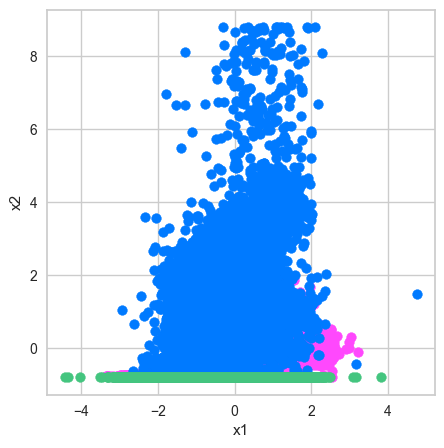

In [104]:
fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X_train_smv[y_train_smv==0][:,0], X_train_smv[y_train_smv==0][:,1], c="#ff48fd")
ax.scatter(X_train_smv[y_train_smv==1][:,0], X_train_smv[y_train_smv==1][:,1], c="#007aff")
ax.scatter(X_train_smv[y_train_smv==2][:,0], X_train_smv[y_train_smv==2][:,1], c="#44c57f")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

In [105]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo', probability=True); 
svm_rbf.fit(X_train_smv, y_train_smv)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [106]:
y_pred_smv = svm_rbf.predict(X_test_smv)

In [107]:
# Para el promedio 'micro':
f1_micro = f1_score(y_test_smv, y_pred_smv, average='micro')

# Para el promedio 'macro':
f1_macro = f1_score(y_test_smv, y_pred_smv, average='macro')

# Para el promedio 'weighted':
f1_weighted = f1_score(y_test_smv, y_pred_smv, average='weighted')

print(f'F1 (Micro): {f1_micro}')
print(f'F1 (Macro): {f1_macro}')
print(f'F1 (Weighted): {f1_weighted}')

F1 (Micro): 0.9526
F1 (Macro): 0.9455168086216467
F1 (Weighted): 0.9520559306989658


In [108]:
auc_svm_rbf = roc_auc_score(y_test_smv,  svm_rbf.predict_proba(X_test_smv), multi_class=multi_class_option)

In [109]:
auc_svm_rbf

0.9876590876927809

In [110]:
#Probamos con todas las variables
svm_rbf_total = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo', probability=True); 
svm_rbf_total.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [111]:
y_pred_smv_total = svm_rbf_total.predict(X_test)

# Para el promedio 'micro':
f1_micro = f1_score(y_test, y_pred_smv_total, average='micro')

# Para el promedio 'macro':
f1_macro = f1_score(y_test, y_pred_smv_total, average='macro')

# Para el promedio 'weighted':
f1_weighted = f1_score(y_test, y_pred_smv_total, average='weighted')

print(f'F1 (Micro): {f1_micro}')
print(f'F1 (Macro): {f1_macro}')
print(f'F1 (Weighted): {f1_weighted}')

F1 (Micro): 0.9500666666666666
F1 (Macro): 0.9430653693703469
F1 (Weighted): 0.9496094876079049


In [112]:
auc_smv_total = roc_auc_score(y_test, svm_rbf_total.predict_proba(X_test), multi_class=multi_class_option)

In [113]:
auc_smv_total

0.9867354682969133

<a id="lr"></a>

## 13. Septimo modelo: Light Gradient Boosting Machine (lightgbm

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [114]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score


# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(X_train, label=y_train) # Creamos el conjunto de datos de LightGBM para entrenamiento
test_data = lgb.Dataset(X_test, label=y_test) # Creaamos el conjunto de datos de LightGBM para prueba

# Configurar los parámetros para la clasificación multiclase
params = {
    'objective': 'multiclass', # Función objetivo a optimizar
    'num_class': 3, # Número de clases a predecir
    'metric': 'multi_logloss', # Métrica a optimizar (función de pérdida)
    'boosting_type': 'gbdt', # Tipo de algoritmo de boosting a utilizar
    'learning_rate': 0.1, # Tasa de aprendizaje
    'force_col_wise' : True, # Para que no de error de dimensiones en el conjunto de prueba (X_test) evita el overhead de convertir a row-wise
    #'device': 'gpu' # Usar GPU para entrenar, da menos score con GPU. Si no tienen GPU comentarizar esta linea
}

# Entrenar el modelo
clf = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)  # Entrenar el modelo con 100 iteraciones

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test) # Predecir en el conjunto de prueba (devuelve las probabilidades de cada clase)
y_pred_max = [np.argmax(line) for line in y_pred] # Obtener la clase con mayor probabilidad para cada muestra

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_max) # Calcular la exactitud (accuracy) del modelo en el conjunto de prueba
f1 = f1_score(y_test, y_pred_max, average='macro') # Calcular el F1-score del modelo en el conjunto de prueba
auc1 = roc_auc_score(y_test, y_pred, multi_class='ovo') # Calcular el AUC del modelo en el conjunto de prueba

print('\n')
print(f'Accuracy: {accuracy}') # Imprimir la exactitud del modelo
print(f'AUC: {auc1}') # Imprimir el AUC del modelo
print(f'F1-score: {f1}') # Imprimir el F1-score del modelo


[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 7
[LightGBM] [Info] Start training from score -0.520395
[LightGBM] [Info] Start training from score -1.663668
[LightGBM] [Info] Start training from score -1.531221


Accuracy: 0.9719333333333333
AUC: 0.9932983613133138
F1-score: 0.9670464707535184


In [115]:
importances = clf.feature_importance(importance_type='split') 
feature_names = np.array(df_label_encoder.loc[:,NUMERICAL_FEATURES].columns) 
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df

Feature  Importance
5  redshift        2204
2         u        1816
1     delta        1381
0     alpha        1218
6  fiber_ID        1075
4  field_ID         973
3   cam_col         333

>   
        - Intentemos encontrar los mejores hiperparametros con GridSearchCV

        - Lamentablemente lo cortamos a los 700minutos de ejecución

In [116]:
# Crear un modelo LightGBM
#lgbm = lgb.LGBMClassifier(objective='multiclass', num_class=3, metric='multi_logloss',
#                          boosting_type='gbdt', random_state=42, device='gpu')

# Definir la cuadrícula de hiperparámetros a explorar
# param_grid = {
#     'num_leaves': [31, 50, 70],
#     'num_leaves': [31, 50, 70],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15],
#     'min_child_weight': [1, 5, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
    # Puedes añadir más parámetros aquí según sea necesario
#}

# Crear un GridSearchCV
#grid = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Ajustar el modelo incluyendo un conjunto de validación y early stopping
#grid.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(10)])

# Mejores parámetros encontrados
#print('Mejores parámetros:', grid.best_params_)


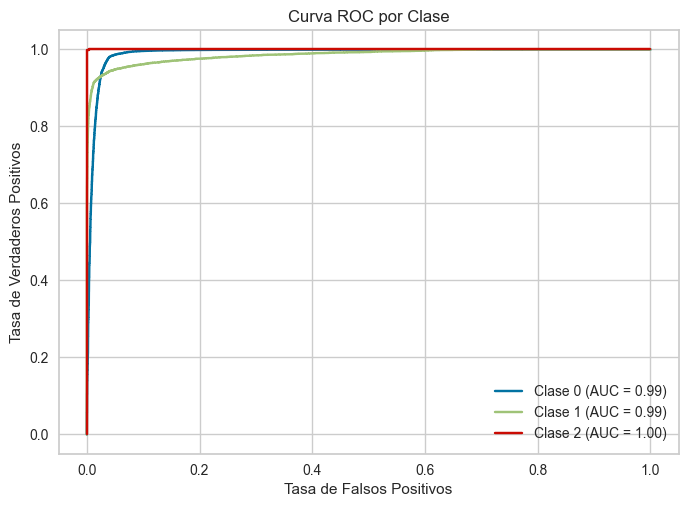

In [117]:
from sklearn.metrics import roc_curve, auc

#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

<a id="conclusion"></a>

## 14. Conclusión

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

<table>
    <tr style="background-color: #000000; color: white;">
        <th>Modelo</th>
        <th>F1</th>
        <th>AUC</th>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>Decision Tree Grupal</td>
        <td>96.42%</td>
        <td>98.71%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>Decision Tree autoML</td>
        <td>95.11%</td>
        <td>95.56%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>KNN Grupal</td>
        <td>87.74%</td>
        <td>94.17%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>KNN autoML</td>
        <td>55.64%</td>
        <td>63.32%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>Random Forest Grupal</td>
        <td>96.65%</td>
        <td>99.12%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>Random Forest autoML</td>
        <td>97.13%</td>
        <td>99.02%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>QDA Grupal</td>
        <td>94.74%</td>
        <td>98.30%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>QDA autoML</td>
        <td>95.38%</td>
        <td>98.13%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>LDA Grupal</td>
        <td>63.82%</td>
        <td>90.47%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>LDA autoML</td>
        <td>64.09%</td>
        <td>92.10%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>SVM - 2 variables Grupal</td>
        <td>94.55%</td>
        <td>98.77%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>SVM total variables Grupal</td>
        <td>94.31%</td>
        <td>98.67%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>SMV total variables autoML</td>
        <td>65.76%</td>
        <td>0.0%</td>
    </tr>
    <tr style="background-color: #FFFFFF; color: black;">
        <td>LGB Grupal</td>
        <td>96.70%</td>
        <td>99.33%</td>
    </tr>
    <tr style="background-color: #FE7575; color: black;">
        <td>LGB autoML</td>
        <td>97.19%</td>
        <td>99.17%</td>
    </tr>
</table>

Como primera instancia usamos un algoritmo de AutoMl llamado Pycaret para saber las metricas de los modelos más cómunes para clasificación multiclase y así implementarlos con Scikit-learn para comparar sus métricas. El uso de pycaret no es recomendable a la hora de poner en producción un modelo, ya que no da contexto de su procesamiento interno y no se tiene control sobre los hiperparámentros i.e es modelo de caja negra. En la tabla anterior se muestran 7 diferentes modelos implementados con una comparativa entre el desarrollo propio con Scikit-learn, llamado grupal, y Pycaret.

Las métricas que escogimos para evaluar los modelos fueron el Macro F1-score y ROC-AUC. Recordemos que el área bajo la curva de la gráfica de ROC nos da una medida de que tanto el modelo es capaz de distinguir entre clases y el F1-Score (en este caso el promedio de todas las clases) nos da un promedio o media armonica entre precisión y el recall.

Para hacer el filtrado de variables importantes previo a la apliación de los modelos se aplico la correlación de sperman con la variable objetivo donde se obtuvo un mayor puntaje para **redshift** (0.3) y el filtro u (0.28). 


Según las métricas contenidas en la tabla anterior el modelo que tiene mejores resultados es el Light Gradient Boosting Machine (LGB) tanto en F1-Score y AUC, seguido por el Random forest. Ambos modelos muestran AUC cercanas al 1. Es decir, que son modelos muy buenos para a clasificación de estos objetos. Para estos modelos se usaron todas las variables.

Con SVM se crearon 2 modelos, el primero con todas las varibles y el segundo con las 2 variables más correlacionadas con la variable objetivo. En la tabla de puntajes se nota que mejora levemente cuando se usan solo las 2 más importantes y el paquete de autoML no tuvo un buen rendimiento en este modelo.

Para clasificar si el objeto observado es una estrella, una galaxia o un Quasars en ambos modelos la variable más importante es el **redshift** o corrimiento al rojo con un valor de 89.97% para un árbol de decisión.  El corrimiento al rojo es el aumento de la longitud de onda de la luz (onda electromagnética) emitida por el objeto dado su movimiento de retroceso (expansión del espacio) o velocidad relativa (Efecto dopler). Esto tiene sentido ya que todas las estrellas del catálogo pertenecen a la Via Lactea y dado que estamos en el mismo marco de referencia tienen corrimientos al rojo pequeños. Por otro lado, las galaxias deben mayoritariamente su corrimiento al rojo por la expansión del universo, el cual es moderado. Finalente, los quasares tienen dos fuentes importantes de corrimiento al rojo, la rotación a altas velocidades angulares  y la expansión del universo  convirtiendolo en el objeto con mayor corrimiento al rojo de los objetos del catálogo. Este hecho se ve claramente reflejado en el box-plot dibujado en la parte final del notebook, donde se nota dichas diferencias. 

A continuación en ambos modelos las variables de más importancia son las intensidades de la luz filtrada en diferentes longitudes de onda. Los filtros más importantes son el **g** y **u**, es decir, ultravioleta y verde con pesos del 4.84 % y 1.5 % respectivamente. Sin embargo, son pesos muy pequeños y las diferencias en la clasificación de los objetos no son apreciables en los box-plot. Hay que tener en cuenta que  los esprectros de emisión de las estrellas difieren poco de las galaxias ya que  estas son un cúmulo de estrellas. Los espectros de los quasares difieren a los anteriores objetos en los filtros i y z. 

En general, todos los modelos excepto el LDA y el KNN dieron buenos resultados a la hora de hacer una clasificación de objetos astronómicos. Agunos modelos como el QDA fueron mejorados con el uso de Scikit-learn. 


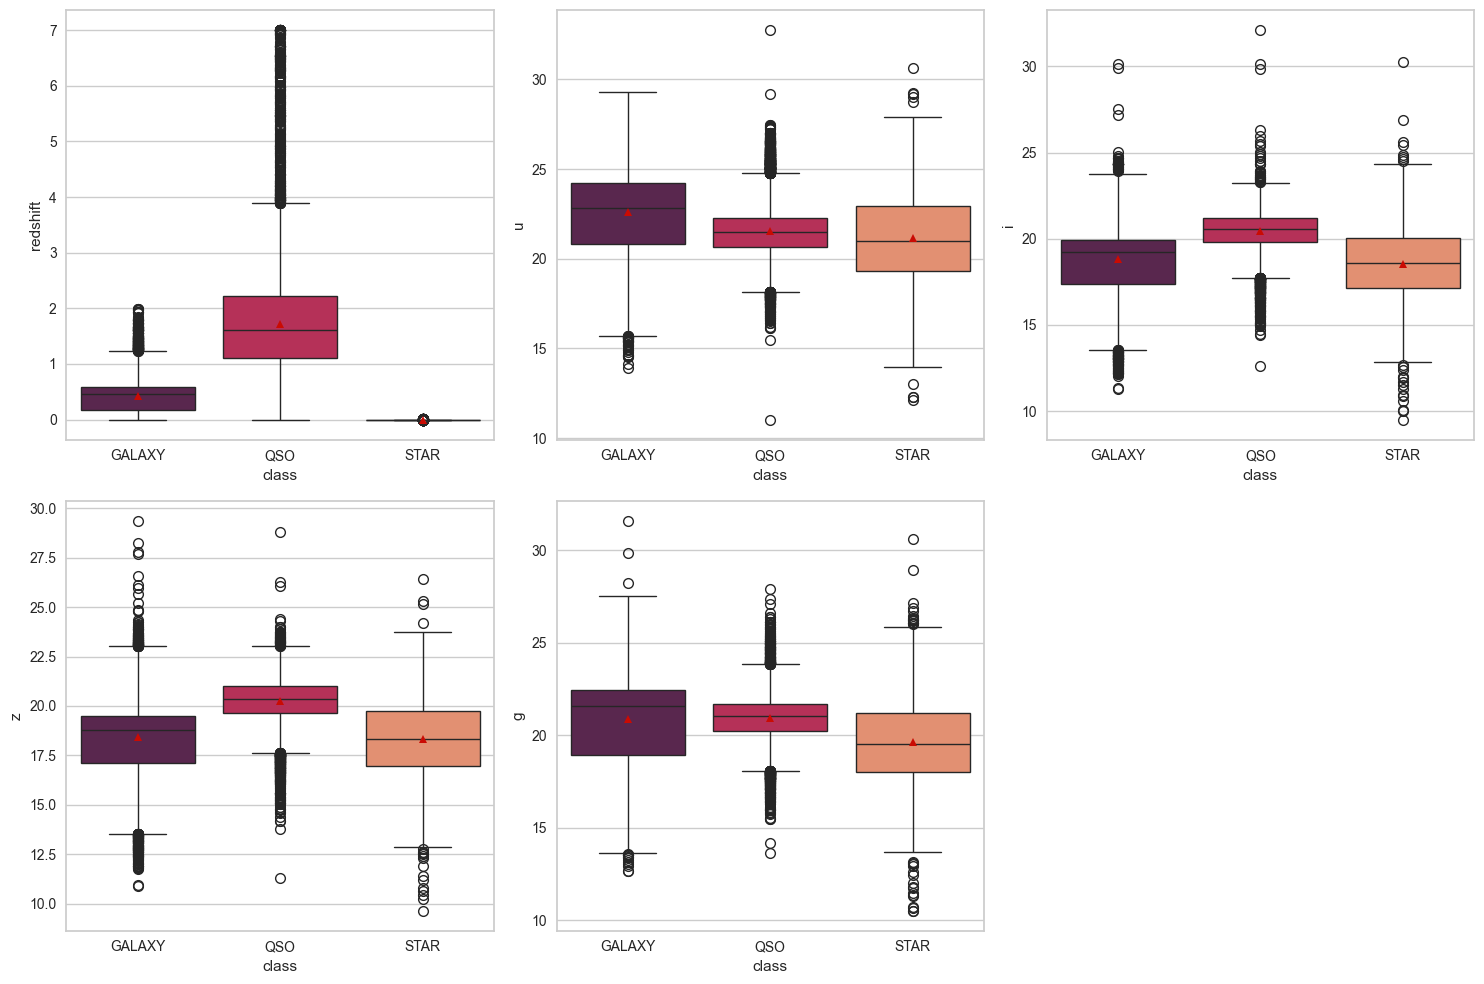

In [118]:
df2 = df[df['u'] > -9000]

IMPORTANT_V = ['redshift', 'u','i','z','g']
plt.figure(figsize=(15, 10))

for i, c in enumerate(IMPORTANT_V, 1):
 plt.subplot(2, 3, i)
 sns.boxplot(x='class', y=c, data=df2, orient="v", palette="rocket", showmeans=True )

plt.tight_layout()

plt.show()
